In [14]:
subject: str = 'ST7011J0'
import pyedflib
psg_path = f'/d/gmi/1/simeon/clas/data/PHYSIONET/sleep-telemetry/{subject}-PSG.edf'


In [15]:
with pyedflib.EdfReader(psg_path) as psg:
    psg.getSignalLabels()

In [16]:
import numpy as np

with pyedflib.EdfReader(psg_path) as psg:
    # read raw digital signal of channel 4 and plot
    n_samples = psg.getNSamples()[4]
    sigbuf = np.zeros(n_samples, dtype=np.int32)
    psg.read_digital_signal(4, 0, n_samples, sigbuf)

    signal_valid = 0 < sigbuf
    eeg_signal = psg.readSignal(0)



Text(0.5, 1.0, 'Signal valid')

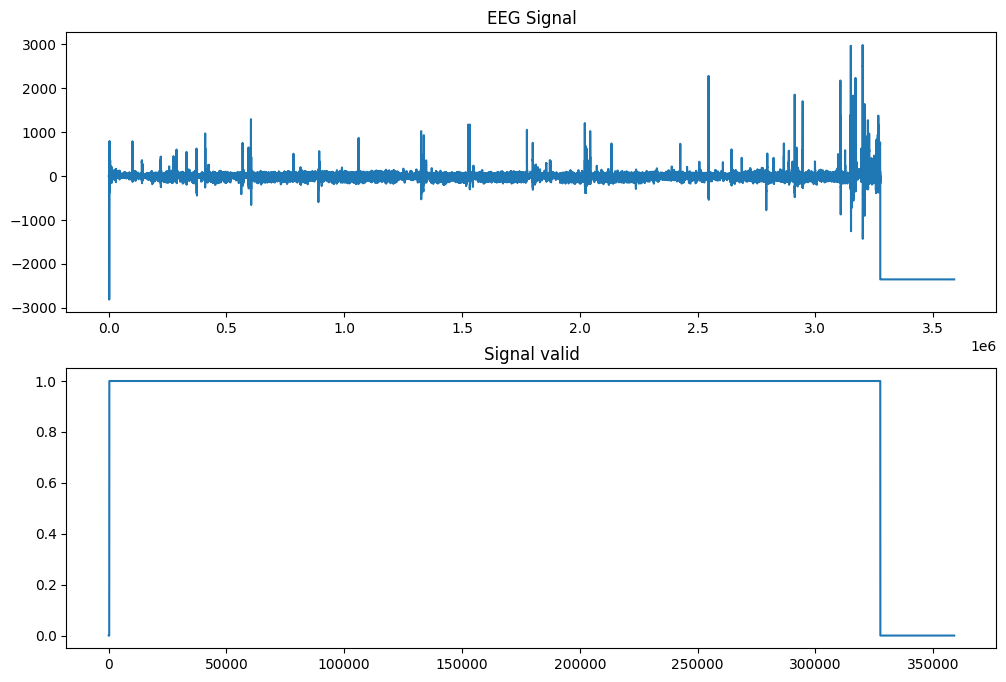

In [17]:
import matplotlib.pyplot as plt

hf, hax = plt.subplots(2, 1, figsize=(12, 8))
hax[0].plot(eeg_signal)
hax[0].set_title('EEG Signal')
hax[1].plot(signal_valid)
hax[1].set_title('Signal valid')